In [1]:
import numpy as np
import pickle as pkl
import pandas as pd
import os

In [2]:
os.chdir('../../../..')
print(os.getcwd())

c:\Users\Paul\Documents\X\4A\S1\HMM\poisson_network_models


In [3]:
# retrieve filenames
directory = 'data/hyperparams_tuning/'
hyperparams_tuning_filenames = os.listdir(directory)
results = {}

# iterate over filenames
for filename in hyperparams_tuning_filenames:
    # get results
    _name,t1,t2,_ = filename.split('_')
    content = pkl.load(open(directory + filename, 'rb'))
    t1,t2 = float(t1), float(t2)

    # save results
    if t1 not in results:
        results[t1] = {}
    if t2 not in results[t1]:
        results[t1][t2] = []
    results[t1][t2].append(content)

# # save results
# pkl.dump(results, open('data/hyperparams_tuning_results.pkl', 'wb'))

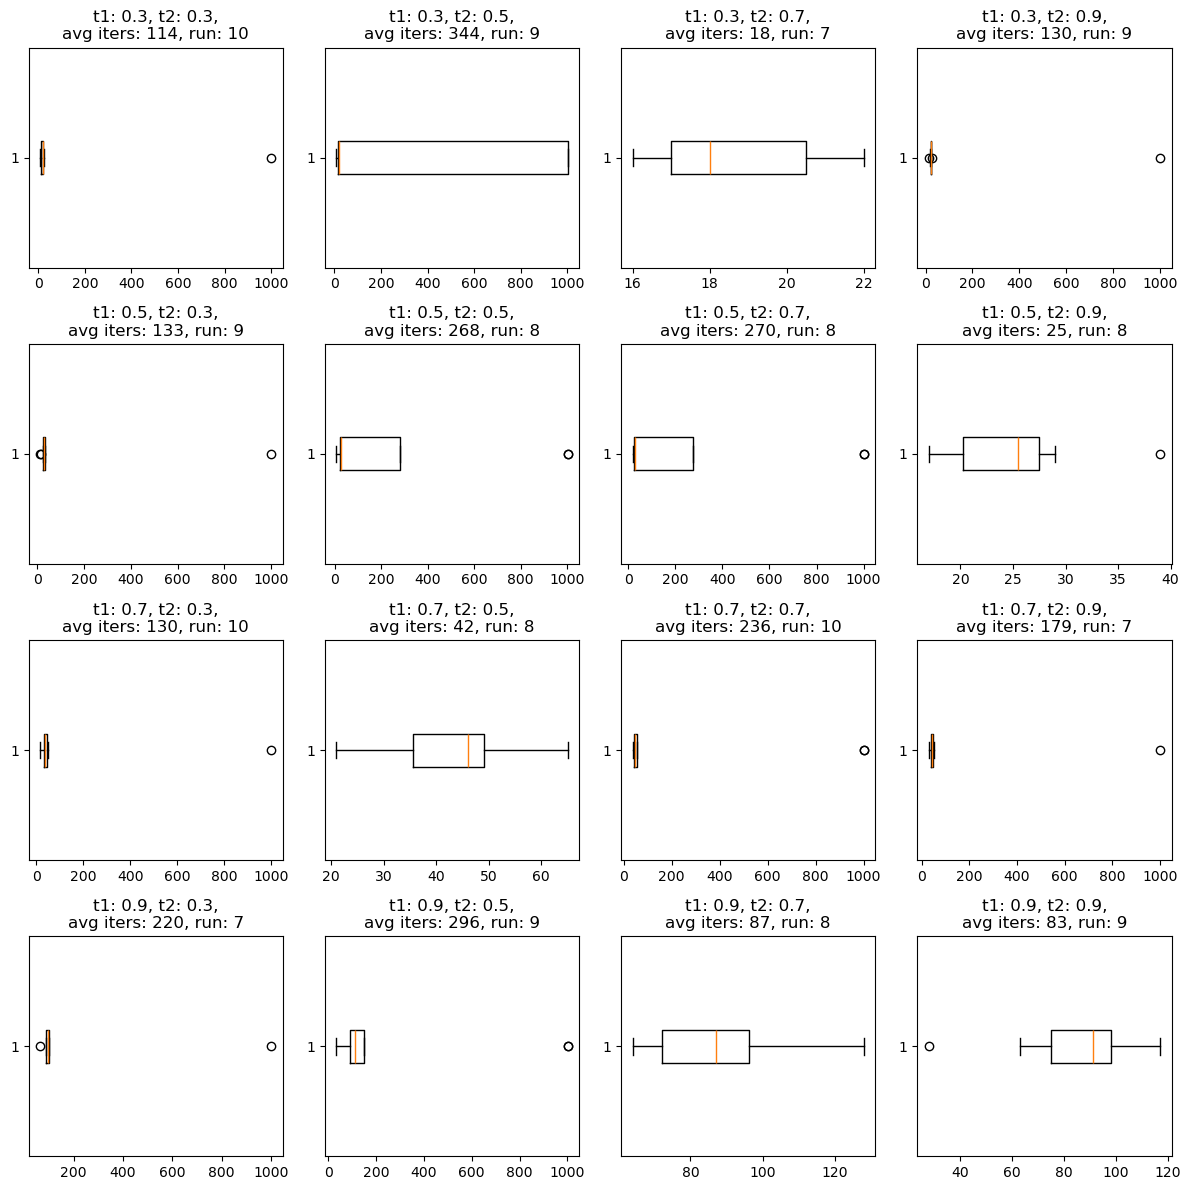

In [6]:
import matplotlib.pyplot as plt

# Initialize a 3x3 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

# retrieve the results
for i,t1 in enumerate(results.keys()):
    for j,t2 in enumerate(results[t1].keys()):
        num_iters = []
        for result in results[t1][t2]:
            num_iters.append(len(result.shared["exponents"]))
        axes[i * 4 + j].boxplot(num_iters, vert=False)
        axes[i * 4 + j].set_title("t1: {}, t2: {},\navg iters: {}, run: {}".format(t1, t2, int(np.mean(num_iters)),len(num_iters)))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()